Bias correction of numerical prediction model temperature forecast Data Set
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the file
df=pd.read_csv("Bias_correction_temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,6/30/2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,6/30/2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,6/30/2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,6/30/2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,6/30/2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#checking shape
df.shape
#There are 7752 columns and 25 rows

(7752, 25)

In [4]:
#checking datatypes
df.dtypes
#Date needs to be changed to date database from object

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

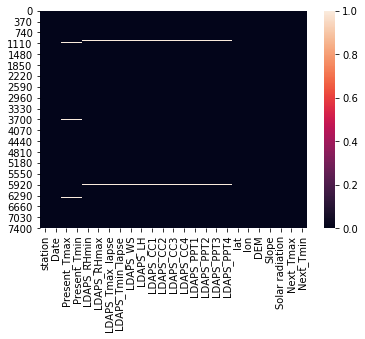

In [5]:
#checking missing values
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()
#The columns, the values as mentioned below are missing

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
# checking unique values in the dataset

col_name=[]
uni_name=[]
table=pd.DataFrame([])
for i in df.columns:
    col_name.append(str(i))
    uni_name.append(df[i].nunique())


table['columns']=col_name
table['No. of counts']=uni_name

table

,columns,No. of counts
0,station,25
1,Date,310
2,Present_Tmax,167
3,Present_Tmin,155
4,LDAPS_RHmin,7672
5,LDAPS_RHmax,7664
6,LDAPS_Tmax_lapse,7675
7,LDAPS_Tmin_lapse,7675
8,LDAPS_WS,7675
9,LDAPS_LH,7675


In [8]:
for i in ['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'lat', 'lon', 'DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']:
    print(df[i].value_counts())
    print("\n")

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64


8/27/2015    25
7/24/2016    25
8/14/2014    25
7/16/2013    25
8/26/2016    25
             ..
7/1/2016     25
8/13/2013    25
7/24/2013    25
8/6/2014     25
8/12/2016    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64


37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     62

In [9]:

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',50)
df[df.isnull().any(axis=1)]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
225,1.0,7/9/2013,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,0.890438,0.634022,0.371975,0.352818,2.645991,0.036680,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5925.883789,23.4,22.0
271,22.0,7/10/2013,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,0.796409,0.570621,0.736160,0.689160,0.022148,0.007261,0.000000,0.000000,37.5102,127.086,21.9668,0.133200,5772.487305,26.1,24.1
300,1.0,7/12/2013,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,0.857962,0.966186,0.959959,0.902762,4.435039,5.055660,1.347418,0.980052,37.6046,126.991,212.3350,2.785000,5893.265625,23.2,20.5
450,1.0,7/18/2013,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,0.392393,0.219702,0.293890,0.178251,0.000000,0.000000,0.000000,0.057358,37.6046,126.991,212.3350,2.785000,5812.293457,27.6,21.8
464,15.0,7/18/2013,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,0.517181,0.231422,0.276836,0.203288,0.000000,0.000000,0.000000,0.008702,37.5507,126.937,30.0464,0.855200,5681.875000,30.7,23.4
627,3.0,7/25/2013,NaN,NaN,43.809799,86.972778,32.293370,24.725570,6.998412,12.913524,0.139798,0.107687,0.068822,0.015787,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5553.048828,31.3,23.3
831,7.0,8/2/2013,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,0.442766,0.342353,0.333352,0.227664,0.086539,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,5357.705566,NaN,NaN
856,7.0,8/3/2013,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,0.473034,0.322410,0.071169,0.173785,0.004247,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,5332.515625,NaN,NaN
881,7.0,8/4/2013,NaN,NaN,75.457825,92.582436,30.168241,26.228888,6.921643,99.902727,0.151918,0.261953,0.228145,0.131788,0.000000,0.000000,0.038057,0.000000,37.5776,126.838,12.3700,0.098500,5306.734863,30.7,25.8
913,14.0,8/5/2013,NaN,NaN,76.040504,94.029243,30.563506,26.743236,7.776664,32.352678,0.278550,0.380058,0.391610,0.168724,0.000000,0.373245,0.059894,0.000000,37.4967,126.927,30.9680,0.618000,5287.500977,28.8,22.2


Observation:
1. If we observe, there are many columns in which details are missing. Over 164 rows has null values in it. 
2. In few cases, output values are missing and in few inputs are missing and in few both are missing.
3. We can fill the details using the mean or mode.


In [10]:
for i in ['Present_Tmax','Present_Tmin','LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','Next_Tmax','Next_Tmin']:
    df[i]=df[i].fillna(df[i].mean())
    


In [11]:
df.isnull().sum()
#to analyse why two values in station and date is missing, we need to check the last 30 rows in which 25 rows will be in a sequence.

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
df.tail(30)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7722,23.0,8/29/2017,23.7,18.4,46.162144,76.678185,22.552933,15.703791,4.152942,47.538868,0.620896,0.649810,4.561761e-01,0.088269,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4482.970215,23.8,17.0
7723,24.0,8/29/2017,23.3,18.5,43.690308,73.350212,22.925278,15.972117,4.339765,33.392886,0.604948,0.646415,4.606599e-01,0.094793,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4478.101074,24.0,17.6
7724,25.0,8/29/2017,23.4,18.4,39.510899,67.031342,23.629683,16.643308,4.338710,6.768910,0.586812,0.648316,4.759192e-01,0.138587,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4490.929199,23.8,17.4
7725,1.0,8/30/2017,20.0,15.1,35.652172,89.973190,24.323737,16.128899,7.087329,108.981108,0.046182,0.014955,0.000000e+00,0.000630,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,4614.761230,23.8,15.1
7726,2.0,8/30/2017,22.5,14.8,30.845957,82.055222,26.616546,17.496198,5.738173,64.607348,0.040142,0.022122,0.000000e+00,0.009035,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,4463.794434,26.5,15.4
7727,3.0,8/30/2017,23.0,17.0,26.563343,78.826996,27.718406,17.772592,5.911668,14.091323,0.055672,0.044992,0.000000e+00,0.007840,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,4458.824707,27.7,16.8
7728,4.0,8/30/2017,22.6,16.7,38.991627,95.432045,24.562156,15.999018,5.608833,120.654731,0.056173,0.009785,0.000000e+00,0.001046,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,4448.519043,26.9,17.0
7729,5.0,8/30/2017,22.9,16.3,36.733143,88.184517,25.855472,17.033742,5.812507,116.093668,0.074161,0.034181,3.517316e-03,0.018011,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,4445.645996,27.9,15.7
7730,6.0,8/30/2017,23.0,17.9,26.961586,81.591942,27.191402,17.795103,6.467678,53.966684,0.068500,0.034151,0.000000e+00,0.004427,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.145700,4459.023438,28.1,17.5
7731,7.0,8/30/2017,23.5,16.6,32.614983,91.536095,25.233300,18.248183,5.036397,118.892933,0.038312,0.076275,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.098500,4440.394043,27.8,18.6


By analysing the above dataset, we can know that 25 rows(stations) pertain to one date. Since, there are 25 rows filled for 8/30/2017, we can drop the next two rows as we donot have information about that.

In [13]:
df=df.dropna(axis=0)

In [14]:
df.isnull().sum()
#All null values are duly filled

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [15]:
#converting the date format from object to date
df['Date']=pd.to_datetime(df['Date'])
df['Date']

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7745   2017-08-30
7746   2017-08-30
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
Name: Date, Length: 7750, dtype: datetime64[ns]

#### Statistical Analysis

In [16]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768461,23.225736,56.758753,88.377102,29.613841,23.512993,7.096514,62.495367,0.368744,0.356047,0.318359,0.299143,0.589089,0.482338,0.276227,0.267328,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275435,22.932835
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,0.256717,0.249039,0.253007,1.918691,1.737965,1.142722,1.185994,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,0.142424,0.103113,0.082777,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,0.554910,0.493971,0.497218,0.067515,0.024224,0.009685,0.000686,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


Observations
1. The mean of present temperature max is 29.7, minimum is 20, median is 29.9 and max is 37.6
2. The minimum of present tempature min is 11, max is 29.9, mean is 23 and median is 23.4.
3. The mean of the Next_Tmax is 30, min is 17, median is 30.40 and max is 38.90
4. The mean of the Next_Tmin is 22.90, min is 11.30, median is 23.10 and max is 29.80

In [17]:
df.head(100)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,1.309282e-01,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,1.277273e-01,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,1.421253e-01,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,1.342487e-01,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,1.700210e-01,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6.0,2013-06-30,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,0.185279,0.280818,0.232841,1.463629e-01,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7.0,2013-06-30,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,0.389600,0.333570,0.270419,1.457054e-01,0.000000,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8.0,2013-06-30,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,0.357856,0.344928,0.272387,1.438406e-01,0.000000,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9.0,2013-06-30,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,0.408766,0.344800,0.264980,1.489111e-01,0.000000,0.000000,0.000000,0.000000,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10.0,2013-06-30,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,0.348292,0.306255,0.245254,1.354435e-01,0.000000,0.000000,0.000000,0.000000,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [18]:
df[['Present_Tmax', 'Present_Tmin', 'Next_Tmax', 'Next_Tmin']]


,Present_Tmax,Present_Tmin,Next_Tmax,Next_Tmin
0,28.7,21.4,29.1,21.2
1,31.9,21.6,30.5,22.5
2,31.6,23.3,31.1,23.9
3,32.0,23.4,31.7,24.3
4,31.4,21.9,31.2,22.5
...,...,...,...,...
7745,23.1,17.8,27.6,17.7
7746,22.5,17.4,28.0,17.1
7747,23.3,17.1,28.3,18.1
7748,23.3,17.7,28.6,18.8


#### Difference between actual and predicted temperature in the dataset

If we observe the dataset carefully, we can understand that each row has predicted values for next day for maximum and minimum temperature and the actual value for the days are also available. The actual values of temperature will be in the present Tmax and present Tmin column and predicted values will be in Next tmax and Next tmin columns. If we want to compare the predicted value of row1 with its actuals, we have to compared row 1 prediction with row 26 actuals as 25 rows relate to one day and from 26th row (for next 25rows) it will relate to next day. 

1. So we can have to ignore first 25 actual temperature data since we will not have predictions for that.
2. We have to ignore last 25 predicted temperature data since we will not have actuals for that.
3. we will compare the 26th value of prediction with first value of actuals, which will give us difference between prediction and actuals(so extracting data properly will be important here).
4. We will calculate the difference or errors, take square of it and take mean of it and finally derive the square root.



In [19]:
#Extracting the actual temperature except first 25 values ie from index 25 we will extract
Actualmax=pd.DataFrame(df['Present_Tmax'].iloc[25:])
Actualmin=pd.DataFrame(df['Present_Tmin'].iloc[25:])
Actualmax=Actualmax.reset_index(drop=True)
Actualmin=Actualmin.reset_index(drop=True)

In [20]:
#Extracting the predicted temperature except last 25 values ie from first till 7726 we will extract
predictedmax=pd.DataFrame(df['Next_Tmax'].iloc[0:7726])
predictedmin=pd.DataFrame(df['Next_Tmin'].iloc[0:7726])
predictedmax=predictedmax.reset_index(drop=True)
predictedmin=predictedmin.reset_index(drop=True)

In [21]:
#This will calculate the difference or error in predicting the max temp and min temp
Error_max_temp=predictedmax.iloc[:,0]-Actualmax.iloc[:,0] 
Error_min_temp=predictedmin.iloc[:,0]-Actualmin.iloc[:,0]

In [22]:
Actualmax.iloc[:,0]

0       28.3
1       30.5
2       30.3
3       31.0
4       30.8
        ... 
7720    23.1
7721    22.5
7722    23.3
7723    23.3
7724    23.2
Name: Present_Tmax, Length: 7725, dtype: float64

In [23]:
print(Error_max_temp)
print()
print(Error_min_temp)

0       0.8
1       0.0
2       0.8
3       0.7
4       0.4
       ... 
7721    0.5
7722    0.5
7723    0.7
7724    0.6
7725    NaN
Length: 7726, dtype: float64

0       0.0
1      -0.4
2      -0.6
3      -0.2
4      -0.1
       ... 
7721   -0.1
7722   -0.1
7723   -0.1
7724    0.0
7725    NaN
Length: 7726, dtype: float64


In [24]:
#The Root mean square error of predicting the maximum temperature for the next day
Root_mean_square_Error_max=(((Error_max_temp)**2).mean())**1/2

Root_mean_square_Error_max

0.438474210365359

In [25]:
#The Root mean square error of predicting the minimum temperature for the next day
Root_mean_square_Error_min=(((Error_min_temp)**2).mean())**1/2
Root_mean_square_Error_min

0.16379211374211497

##### Observations
we can observe that Root mean square error of minimum temperature is lower than the maximum temperature , so we can conclude that the predictions of minimum temperature were better than the maximum temperature. 

##### Checking the distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000236124E8408>,
      dtype=object)

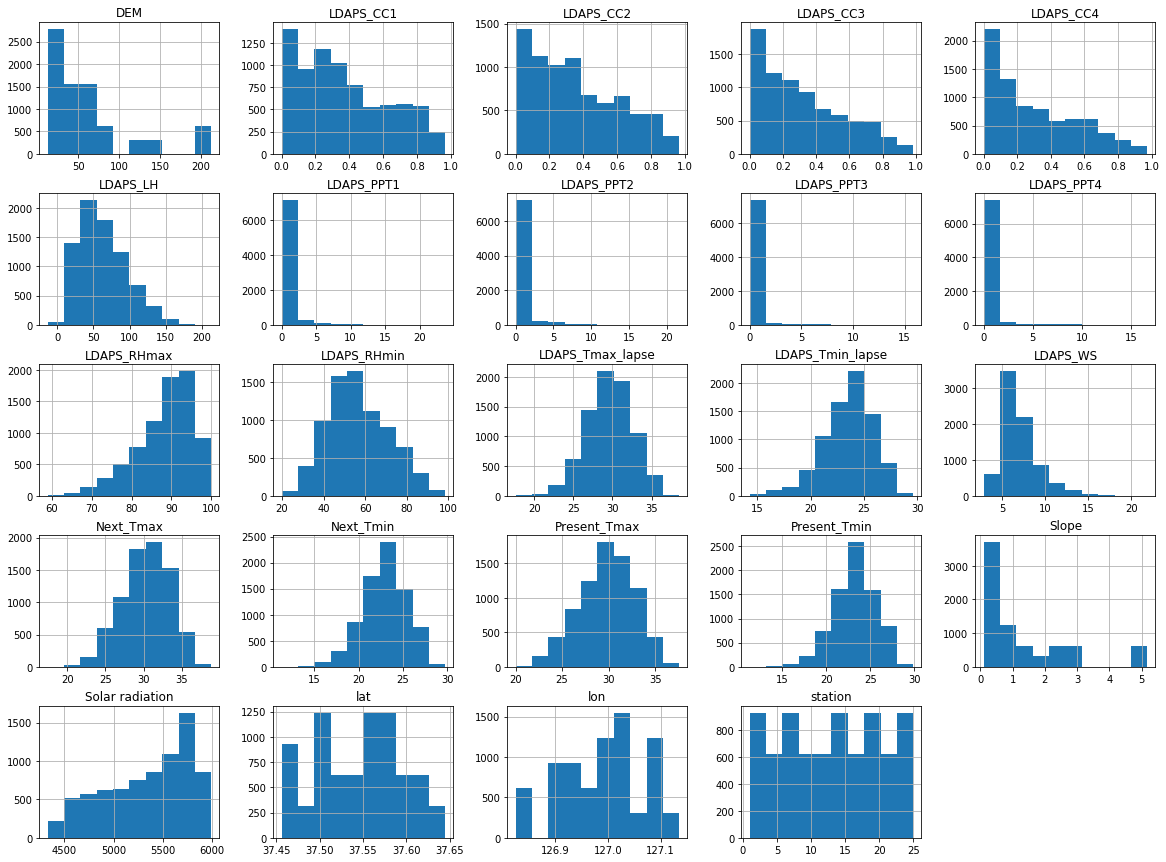

In [26]:
df.hist(figsize=(20,15))
#Most of the columns are symmetric

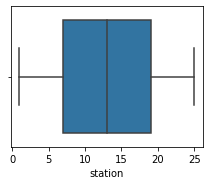

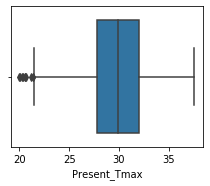

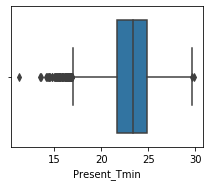

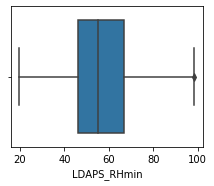

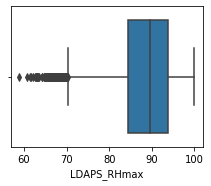

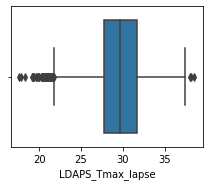

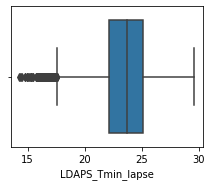

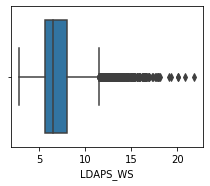

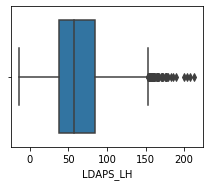

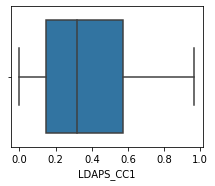

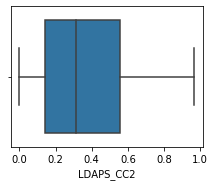

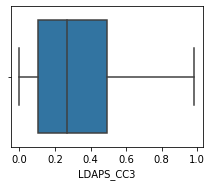

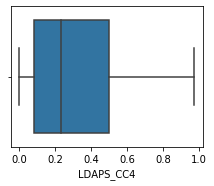

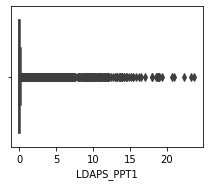

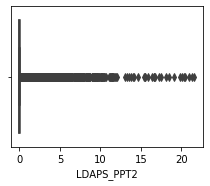

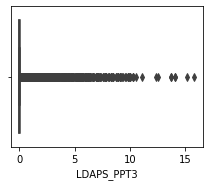

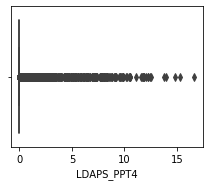

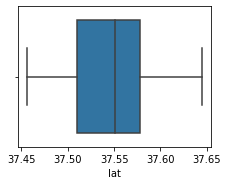

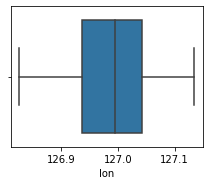

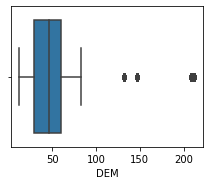

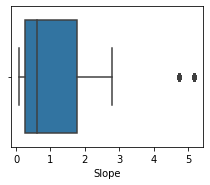

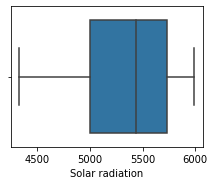

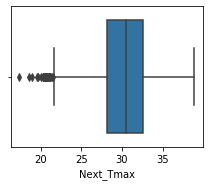

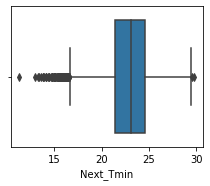

In [27]:
# checking outliers
col_list=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']
for i in col_list:
    plt.figure(figsize=(20,15))
    plt.subplot(5,5,5)
    sns.boxplot(df[i])

In [28]:
Observations:
1. There are outliers in the data which needs to be treated later in the dataset.

SyntaxError: invalid syntax (<ipython-input-28-910c86db8c2d>, line 1)

In [ ]:
#scatter plots. checking the attributes relationship with the target 'Next_Tmax'. 

for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.title(str(i)+' with '+'Next_Tmax')
        sns.scatterplot(x=df['Next_Tmax'], y=df[i], data=df)
        plt.show()

Observations of attributes relationship with Next_Tmax
1. Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Next_Tmin have positive correlation.
2. LDAPS_RHmin, LDAPS_RHmax, LDAPS_WS, LDAPS_CCI, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4 have negative correlation.

In [ ]:

#scatter plots. checking the attributes relationship with the target 'Next_Tmin'. 

for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(5,5))
        plt.title(str(i)+' with '+'Next_Tmin')
        sns.scatterplot(x=df['Next_Tmin'], y=df[i], data=df)
        plt.show()

Observations of attributes relationship with Next_Tmax
1. Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Next_Tmax have positive correlation.
2. Rest all doesnot show clear positive or negative correlation with the target.

#### Checking Correlation

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [ ]:
df.corr()

Observations
1. LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 are positively correlated with each other. 
2. Next_Tmax and Next_Tmin are positively correlated with Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse.
3. Present_Tmax are Present_Tmin positively correlated with each other.

#### Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Date']=lb.fit_transform(df['Date']) #.astype(str))

In [31]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [32]:
df1=df.drop('station',axis=1) #dropping station as it is only for identifying the station

In [33]:
df1.head()

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


#### removing outliers

In [34]:
#training dataset
from scipy.stats import zscore
z=np.abs(zscore(df1))
print("The datashape before removing outliers is ", df1.shape)
df2=df1[(z<3).all(axis=1)]
print("The datashape after removing outliers is ", df2.shape)

The datashape before removing outliers is  (7750, 24)
The datashape after removing outliers is  (6888, 24)


#### splitting the data into input and output variables
The training data will be split into input and output variables. 
The training data has two variables, Next_Tmax and Next_Tmin. We will have two targets to predict.
We will build separate models for predicting two targets

In [35]:
x=df2.drop(['Next_Tmax','Next_Tmin'], axis=1)
x.shape

(6888, 22)

In [36]:
y1=pd.DataFrame(df2['Next_Tmax'])
y2=pd.DataFrame(df2['Next_Tmin'])
print(y1.shape)
print(y2.shape)

(6888, 1)
(6888, 1)


#### Checking the skewness in the datasets

In [37]:
x.skew()

Date                0.005349
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            1.088575
LDAPS_LH            0.569060
LDAPS_CC1           0.595343
LDAPS_CC2           0.501691
LDAPS_CC3           0.700518
LDAPS_CC4           0.711008
LDAPS_PPT1          3.723069
LDAPS_PPT2          4.859920
LDAPS_PPT3          5.479300
LDAPS_PPT4          5.926613
lat                 0.108039
lon                -0.275324
DEM                 1.765466
Slope               1.595105
Solar radiation    -0.505080
dtype: float64

In [38]:
#using sqrt function to reduce the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [39]:
x.skew()
#checking the skewness again

Date                0.005349
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            0.734981
LDAPS_LH           -0.004968
LDAPS_CC1          -0.174941
LDAPS_CC2           0.501691
LDAPS_CC3          -0.102498
LDAPS_CC4           0.003371
LDAPS_PPT1          2.396424
LDAPS_PPT2          3.031074
LDAPS_PPT3          3.254610
LDAPS_PPT4          3.592047
lat                 0.108039
lon                -0.275324
DEM                 1.174340
Slope               0.883783
Solar radiation    -0.505080
dtype: float64

In [40]:
#using log1p function to reduce the skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [41]:
x.skew()
#the skewness has reduced to a certain extent

Date                0.005349
Present_Tmax       -0.274048
Present_Tmin       -0.225739
LDAPS_RHmin         0.305363
LDAPS_RHmax        -0.687967
LDAPS_Tmax_lapse   -0.107947
LDAPS_Tmin_lapse   -0.382885
LDAPS_WS            0.477470
LDAPS_LH           -0.004968
LDAPS_CC1          -0.174941
LDAPS_CC2           0.501691
LDAPS_CC3          -0.102498
LDAPS_CC4           0.003371
LDAPS_PPT1          1.949093
LDAPS_PPT2          2.386907
LDAPS_PPT3          2.649776
LDAPS_PPT4          2.973804
lat                 0.108039
lon                -0.275324
DEM                 0.515345
Slope               0.498994
Solar radiation    -0.505080
dtype: float64

In [42]:
x.isnull().sum()
#After removing skewness, one value in LDAPS_LH has become null

Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            1
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
dtype: int64

In [43]:
x[x.isnull().any(axis=1)]
#checking which row has null value

,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
6244,249,29.4,22.0,92.217072,99.999008,24.909289,22.697208,1.450825,NaN,0.976853,0.883442,0.94747,0.948993,1.02085,0.480396,0.54283,0.90048,37.6181,127.004,2.573066,1.155233,5926.908691


In [44]:
#replacing the null value it with the column mean value
x=x.fillna(x['LDAPS_LH'].mean())

#### Scaling the data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-1.751275,-0.434229,-0.828313,0.192637,0.437422,-0.663279,-0.291150,0.086745,0.353317,-0.236411,-0.532440,-0.376235,-0.428167,-0.523948,-0.470577,-0.443511,-0.393349,1.215021,0.002447,2.127595,1.304742,1.552140
1,-1.751275,0.687209,-0.741633,-0.241178,0.363364,-0.013229,0.172937,-0.619617,-0.166881,-0.274050,-0.332489,-0.388320,-0.446464,-0.523948,-0.470577,-0.443511,-0.393349,1.215021,0.516937,-0.040990,-0.395048,1.257982
2,-1.751275,0.582074,-0.004851,-0.499842,-0.596469,0.074807,0.412468,-0.326659,-1.399747,-0.348164,-0.308691,-0.162776,-0.365862,-0.523948,-0.470577,-0.443511,-0.393349,0.674208,0.843199,-0.432312,-0.875272,1.244279
3,-1.751275,0.722254,0.038489,0.191486,1.214323,-0.066672,-0.147040,-0.648075,0.248749,-0.315600,-0.440112,-0.379121,-0.409422,-0.523948,-0.470577,-0.443511,-0.393349,2.024238,0.391451,-0.012784,1.192323,1.228591
4,-1.751275,0.511985,-0.611613,0.041939,0.298287,-0.282806,-0.074677,-0.590479,1.302713,-0.640712,-0.339906,-0.286631,-0.220569,-0.523948,-0.470577,-0.443511,-0.393349,0.135398,1.809436,-0.365809,-0.408590,1.234750


## Part - 1 Model for predicting Next_Tmax (y1)

In [46]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y1):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y1)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y1,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [47]:
lr=LinearRegression()
max_r2_score(lr,x,y1)

The maximum r2 score 0.7691463160918042 is achieved at random state 43


In [48]:
train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=43,test_size=0.20)

In [49]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y1)
gdk.best_params_

{'n_neighbors': 10}

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y1)
gdd.best_params_

{'criterion': 'mse'}

In [51]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y1)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [52]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y1)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y1,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y1,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y1,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.7691463160918042
The cross val score is 0.6366033307175175
The mean squared error is 1.986312386422828
The root mean squared error is 1.4093659519169703




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.8600933541986703
The cross val score is 0.5726154439148948
The mean squared error is 1.2037854401689563
The root mean squared error is 1.0971715636895427




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
The r2 score is 0.788232535

In [53]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.769146,0.636603,1.986312,1.409366
1,KNeighborsRegressor,0.860093,0.572615,1.203785,1.097172
2,DecisionTreeRegressor,0.788233,0.379645,1.822091,1.349848
3,SVR,0.924201,0.632633,0.652191,0.807583


In [55]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#### Random Forest Regressor

In [365]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y1)
gdrf.best_params_

{'n_estimators': 500}

In [366]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y1)

The maximum r2 score 0.9082957150064486 is achieved at random state 45


In [367]:
#Let us check the cross val score for RandomForest
cross=cross_val_score(rf,x,y1,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6547928557883772


#### GradientBoostingRegressor

In [56]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y1)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [57]:

#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y1)

The maximum r2 score 0.9267750263991177 is achieved at random state 66


In [58]:
#Let us check the cross val score for GradientBoosting
cross=cross_val_score(gb,x,y1,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6638734555130605


In [372]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y1)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [373]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=500,learning_rate=0.01)
max_r2_score(ad,x,y1)

The maximum r2 score 0.7340590253754289 is achieved at random state 51


In [374]:
#Let us check the cross val score for Adaboost
cross=cross_val_score(ad,x,y1,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6213517219489797


In [384]:
result2=pd.DataFrame({'Boosters':['RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.901,0.927,0.734],'Cross_val_score':[0.655,0.662,0.621]})
result2

,Boosters,R2 Score,Cross_val_score
0,RandomForestRegressor,0.901,0.655
1,GradientBoostRegressor,0.927,0.662
2,AdaBoostRegressor,0.734,0.621


In [393]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.769140,0.636622,1.986365,1.409385
1,KNeighborsRegressor,0.860092,0.572582,1.203795,1.097176
2,DecisionTreeRegressor,0.799809,0.392606,1.722483,1.312434
3,SVR,0.924342,0.633070,0.650976,0.806831


In [60]:
#GradientBoostingRegressor is giving the better scores. So we can finalise the same
train_x,test_x,train_y1,test_y1=train_test_split(x,y1,random_state=46,test_size=0.20)
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
gb.fit(train_x,train_y1)
pred=gb.predict(test_x)
r2score=r2_score(test_y1,pred)
cv=cross_val_score(gb,x,y1,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.9252016476396953
The cross val score is 0.6618667548480814


In [397]:
import warnings
warnings.filterwarnings('ignore')

In [398]:
from sklearn.externals import joblib
joblib.dump(gb,"Project17_first prediction_Temperature_Forecast.pkl")

['Project17_first prediction_Temperature_Forecast.pkl']

## Part - 2 Model for predicting Next_Tmin (y2)

In [343]:
#Checking the best random state for finalising the train and test data
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def max_r2_score(reg,x,y2):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y2)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y2,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at random state", final_r_state)

In [344]:
lr=LinearRegression()
max_r2_score(lr,x,y2)

The maximum r2 score 0.8260124928067004 is achieved at random state 85


In [345]:
train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=85,test_size=0.20)

In [346]:
#Let us check the performances of other models and to derive at the best parameters for the models, let us use Gridsearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y2)
gdk.best_params_

{'n_neighbors': 10}

In [347]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y2)
gdd.best_params_

{'criterion': 'mse'}

In [348]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y2)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [349]:
score=[]
cv=[]
Mean=[]
Root=[]

from sklearn.model_selection import cross_val_score

models=[LinearRegression(),KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mse'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y2)
    pred=i.predict(test_x)
    print(i)
    r2score=r2_score(test_y2,pred)
    score.append(r2score)
    print("The r2 score is", r2score)
    cscore=cross_val_score(i,x,y2,scoring='r2').mean()
    cv.append(cscore)
    print("The cross val score is", cscore)
    meanerror=mean_squared_error(test_y2,pred)
    Mean.append(meanerror)
    print("The mean squared error is", meanerror)
    rooterror=np.sqrt(meanerror)
    print("The root mean squared error is", rooterror)
    Root.append(rooterror)
    print("\n")
    print("\n")


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The r2 score is 0.8260124928067004
The cross val score is 0.7540082975802331
The mean squared error is 0.9598684628229011
The root mean squared error is 0.9797287700291857




KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
The r2 score is 0.8795448109920172
The cross val score is 0.5800834314750585
The mean squared error is 0.664537006002849
The root mean squared error is 0.8151913922526716




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
The r2 score is 0.767929771

In [350]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.826012,0.754008,0.959868,0.979729
1,KNeighborsRegressor,0.879545,0.580083,0.664537,0.815191
2,DecisionTreeRegressor,0.767930,0.468637,1.280304,1.131505
3,SVR,0.941526,0.582247,0.322593,0.567973


In [352]:
#Let us try to use ensemble techniques
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [353]:
#Selecting the best parameters using GridSearchCV
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y2)
gdrf.best_params_

{'n_estimators': 500}

In [355]:
#Lets check the r2 score 
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y2)

The maximum r2 score 0.911881143524342 is achieved at random state 45


In [357]:
#Let us check the cross val score for RandomForest
cross=cross_val_score(rf,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.767791727659688


In [354]:
#### GradientBoostingRegressor

In [358]:
#selecting the best parameters 
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y2)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [359]:

#Lets check the r2 score 
gb=GradientBoostingRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(gb,x,y2)

The maximum r2 score 0.9356856399776431 is achieved at random state 45


In [360]:
#Let us check the cross val score for GradientBoosting
cross=cross_val_score(gb,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.6713487851492606


In [361]:
#selecting the best parameters
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y2)
gad.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [362]:
#Lets check the r2 score 
ad=AdaBoostRegressor(n_estimators=500,learning_rate=0.01)
max_r2_score(ad,x,y2)

The maximum r2 score 0.7935263487598593 is achieved at random state 45


In [364]:
#Let us check the cross val score for Adaboost
cross=cross_val_score(ad,x,y2,cv=5,scoring='r2').mean()
print("The cross val score is", cross)

The cross val score is 0.7183190692618975


In [375]:
result2=pd.DataFrame({'Boosters':['RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.912,0.936,0.794],'Cross_val_score':[0.768,0.671,0.718]})
result2

,Boosters,R2 Score,Cross_val_score
0,RandomForestRegressor,0.912,0.768
1,GradientBoostRegressor,0.936,0.671
2,AdaBoostRegressor,0.794,0.718


In [376]:
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error
0,LinearRegression,0.826012,0.754008,0.959868,0.979729
1,KNeighborsRegressor,0.879545,0.580083,0.664537,0.815191
2,DecisionTreeRegressor,0.767930,0.468637,1.280304,1.131505
3,SVR,0.941526,0.582247,0.322593,0.567973


In [379]:
#Random Forest Regressor is giving the better scores in both r2score and cross val score(Gradient booster is giving slightly better r2score, but cv score is lesser than random forest). So we can finalise the same
train_x,test_x,train_y2,test_y2=train_test_split(x,y2,random_state=45,test_size=0.20)
rf=RandomForestRegressor(n_estimators=500)
rf.fit(train_x,train_y2)
pred=rf.predict(test_x)
r2score=r2_score(test_y2,pred)
cv=cross_val_score(rf,x,y2,cv=5,scoring='r2').mean()
print("The accuracy score is", r2score)
print("The cross val score is", cv)

The accuracy score is 0.9118964539914284
The cross val score is 0.7679482472065049


In [400]:
from sklearn.externals import joblib
joblib.dump(rf,"Project17_second prediction_Temperature_Forecast.pkl")

['Project17_second prediction_Temperature_Forecast.pkl']